[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W3/W3P5.ipynb)

In [52]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [53]:
def download_data():  ### This dude will download the dataset from the directory directly!
  !wget https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch2data.zip
  !unzip "/content/ch2data.zip" -d "/content/ch2data/"
  if not os.getcwd() == '/content/ch2data':
    os.chdir("ch2data")
  else:
    print(f"Current directory is now {os.getcwd()}")


def to_dataframe(text):
    """
    
    Parameters
    ----------
    text : this dude is a text file.

    Returns
    -------
    Pandas dataframe

    """    
    L = []
    headers = []
    with open(text) as file:
        T = file.readlines()
        for i, t in enumerate(T):
            if i == 0:
                for header  in t[:-1].split():
                  headers.append(header)      
            else:
                L.append(t[0:-1].split())
    L = pd.DataFrame(L)
    
    L = L.apply(pd.to_numeric)
    L.columns = headers
    return L

In [54]:
download_data()
os.listdir()   ### make sure that you are at the right directory

--2022-10-27 12:15:42--  https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch2data.zip
Resolving faculty.chicagobooth.edu (faculty.chicagobooth.edu)... 128.135.211.142
Connecting to faculty.chicagobooth.edu (faculty.chicagobooth.edu)|128.135.211.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 557379 (544K) [application/x-zip-compressed]
Saving to: ‘ch2data.zip’

ch2data.zip         100%[===================>] 544.32K   456KB/s    in 1.2s    

2022-10-27 12:15:44 (456 KB/s) - ‘ch2data.zip’ saved [557379/557379]

Archive:  /content/ch2data.zip
replace /content/ch2data/d-aapl0305.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/ch2data/d-aapl0305.txt  
replace /content/ch2data/d-ibm3dx7008.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/ch2data/d-ibm3dx7008.txt  
  inflating: /content/ch2data/d-sp55008.txt  
  inflating: /content/ch2data/d-vix0810.txt  
  inflating: /content/ch2data/m-3m4608.txt 

['d-aapl0305.txt',
 'ch2data.zip',
 'm-ibm3dx2609.txt',
 'q-jnj-earns-9211.txt',
 'm-3m4608.txt',
 'q-gdpc96.txt',
 'q-gnp4710.txt',
 'm-dec12910.txt',
 'w-gs3yr.txt',
 'q-gdp4708.txt',
 'm-dec125910-6111.txt',
 'd-vix0810.txt',
 'd-ibm3dx7008.txt',
 'w-tb6ms.txt',
 'm-aaa-1911.txt',
 'w-tb3ms.txt',
 'm-ibm3dx2608.txt',
 'm-baa-1911.txt',
 'q-GNPC96.txt',
 'd-sp55008.txt',
 'm-ibmsp6709.txt',
 'q-ko-earns8309.txt',
 'm-unrate-4811.txt',
 'm-deciles08.txt',
 'w-gs1yr.txt']

In [55]:
try:
    data = to_dataframe('q-gnp4710.txt')
except Exception as ex:
    print(f"Something is wrong with directories or {ex}")

In [56]:
data

,Year,Mon,Dat,VALUE
0,1947,1,1,238.1
1,1947,4,1,241.5
2,1947,7,1,245.6
3,1947,10,1,255.6
4,1948,1,1,261.7
...,...,...,...,...
248,2009,1,1,14172.2
249,2009,4,1,14164.2
250,2009,7,1,14281.9
251,2009,10,1,14442.8


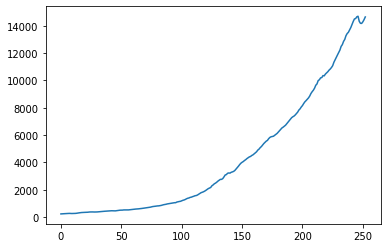

In [57]:
plt.plot(data["VALUE"])

 # For some specific reasons we apply some transformations to our data!

In [58]:
data_log =  data.iloc[:, -1].apply(np.log)   ###applying log transformation here

In [59]:
data_log_diff = data_log.diff() ### the first difference
data_log_diff = data_log_diff[1:] ### avoid N/A value


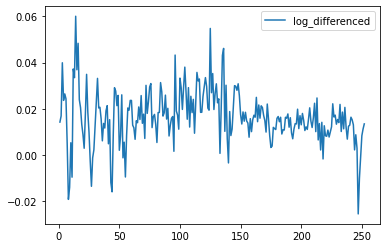

In [60]:
plt.plot(data_log_diff, label = "log_differenced")
plt.legend()
plt.show()

In [61]:
import statsmodels
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

In [62]:
model = ARIMA(endog = data_log_diff, order = (1,0,0))
fit_model = model.fit()

In [63]:
fit_model.bic

-1589.2806591646106

In [64]:
aic_ = []
bic_ = []
for i in range(0,15):
  model = ARIMA(endog = data_log_diff, order = (i,0,0))
  fit_model = model.fit()
  aic_.append(fit_model.aic)
  bic_.append(fit_model.bic)


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [65]:
aic_ = np.array(aic_)
bic_ = np.array(bic_) #### we transform everything to numpy arrays for brevity.

In [66]:
aic_ + abs(np.min(aic_))   ### to get the same results as in the book

array([77.76387822, 11.91300776,  8.79080429,  4.66511567,  6.27692813,
        5.938889  ,  5.10143556,  4.59800774,  6.57913901,  0.        ,
        0.63989952,  2.6280889 ,  2.08872548,  4.06755703,  0.17846331])

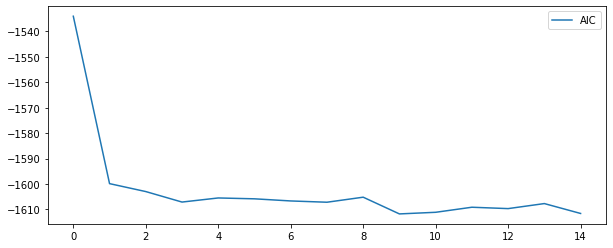

In [67]:
plt.figure(figsize = (10,4))
plt.plot(aic_, label = "AIC")
plt.legend()
plt.show()

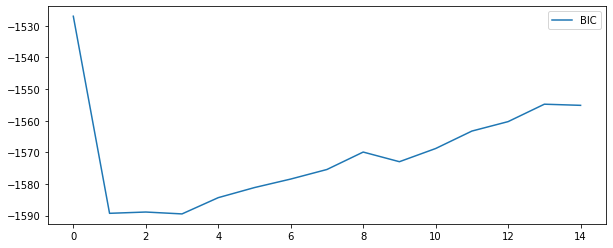

In [68]:
plt.figure(figsize = (10,4))
plt.plot(bic_, label = "BIC")
plt.legend()
plt.show()

In [69]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

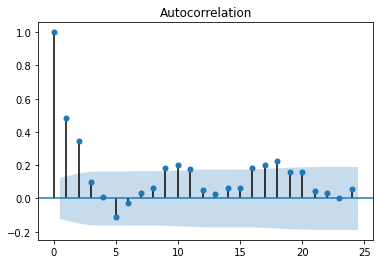

In [70]:
plot_acf(data_log_diff, lags = 24);

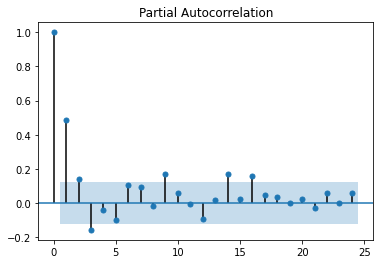

In [71]:
plot_pacf(data_log_diff, lags = 24);

#What is your conclusion? Which p value would you choose in this case?

###Hold up! There is a better way!

In [72]:
from statsmodels.tsa.ar_model import ar_select_order

In [73]:
T = ar_select_order(data_log_diff, maxlag = 12)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [74]:
T.aic

{(1, 2, 3): -9.322531691296716,
 (1, 2, 3, 4, 5, 6, 7, 8, 9): -9.321384197587161,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10): -9.319126382547413,
 (1, 2, 3, 4): -9.314327692011338,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12): -9.313310744812236,
 (1, 2, 3, 4, 5): -9.312684138880329,
 (1, 2): -9.31252934183289,
 (1, 2, 3, 4, 5, 6): -9.312487544666105,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11): -9.310868105822323,
 (1, 2, 3, 4, 5, 6, 7): -9.310393279120541,
 (1, 2, 3, 4, 5, 6, 7, 8): -9.30213392934647,
 (1,): -9.29569265611525,
 0: -9.025805416360422}

In [75]:
T.bic

{(1, 2): -9.269021355291116,
 (1,): -9.266687331754067,
 (1, 2, 3): -9.26452104257435,
 (1, 2, 3, 4): -9.241814381108378,
 (1, 2, 3, 4, 5): -9.22566816579678,
 (1, 2, 3, 4, 5, 6): -9.210968909401965,
 (1, 2, 3, 4, 5, 6, 7): -9.194371981675808,
 (1, 2, 3, 4, 5, 6, 7, 8, 9): -9.176357575781246,
 (1, 2, 3, 4, 5, 6, 7, 8): -9.171609969721144,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10): -9.159597098560905,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11): -9.136836159655223,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12): -9.124776136464543,
 0: -9.01130275417983}

###Let's fit AR(3) model and see what we can do!

In [96]:
model = ARIMA(endog = data_log_diff, order = (9,0,0))
fit_model = model.fit()

(array([ 1.,  0.,  0.,  1.,  1.,  1.,  2.,  2.,  5.,  3.,  1., 10.,  6.,
        15., 28., 15., 25., 31., 37., 16., 16.,  8.,  8.,  3.,  5.,  1.,
         3.,  2.,  1.,  1.,  1.,  0.,  1.,  1.,  1.]),
 array([-0.03461508, -0.0325995 , -0.03058393, -0.02856836, -0.02655278,
        -0.02453721, -0.02252164, -0.02050606, -0.01849049, -0.01647492,
        -0.01445934, -0.01244377, -0.0104282 , -0.00841262, -0.00639705,
        -0.00438148, -0.0023659 , -0.00035033,  0.00166524,  0.00368082,
         0.00569639,  0.00771196,  0.00972754,  0.01174311,  0.01375868,
         0.01577426,  0.01778983,  0.0198054 ,  0.02182098,  0.02383655,
         0.02585212,  0.0278677 ,  0.02988327,  0.03189884,  0.03391441,
         0.03592999]),
 <a list of 35 Patch objects>)

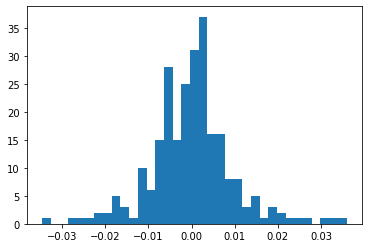

In [97]:
plt.hist(fit_model.resid,bins = 35)

In [92]:
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  VALUE   No. Observations:                  252
Model:                ARIMA(15, 0, 0)   Log Likelihood                 821.840
Date:                Thu, 27 Oct 2022   AIC                          -1609.679
Time:                        12:18:45   BIC                          -1549.679
Sample:                             0   HQIC                         -1585.536
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0158      0.002      7.026      0.000       0.011       0.020
ar.L1          0.4140      0.065      6.412      0.000       0.287       0.540
ar.L2          0.2288      0.063      3.629      0.000       0.105       0.352
ar.L3         -0.1102      0.065     -1.691      0.091      -0.238       0.018
ar.L4         -0.0179      0.065     -0.273      0.785      -0.146       0.110
ar.L5         -0.1605      0.061     -2.612      0.009      -0.281      -0.040
ar.L6          0.1087      0.076      1.439      0.150      -0.039       0.257
ar.L7          0.0575      0.087      0.663      0.507      -0.112       0.228
ar.L8         -0.1135      0.063     -1.801      0.072      -0.237       0.010
ar.L9          0.1615      0.072      2.242      0.025       0.020       0.303
ar.L10         0.1004      0.070      1.434      0.152      -0.037       0.238
ar.L11         0.0609      0.068      0.890      0.373      -0.073       0.195
ar.L12        -0.1436      0.072     -1.987      0.047      -0.285      -0.002
ar.L13        -0.0544      0.069     -0.790      0.430      -0.189       0.081
ar.L14         0.1628      0.076      2.153      0.031       0.015       0.311
ar.L15         0.0181      0.069      0.263      0.792      -0.117       0.153
sigma2      8.547e-05   6.12e-06     13.976      0.000    7.35e-05    9.75e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                41.64
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [98]:
residual = fit_model.resid  #### this dude should behave like a white noise. 

In [88]:
np.mean(residual)  #### it is almost of mean 0

2.5747093779501928e-05

In [81]:
np.std(residual, ddof = 1) ### here the standard deviation is pretty close to 0

0.00979418578640709

In [99]:
statsmodels.stats.diagnostic.acorr_ljungbox(residual, return_df = True, model_df = 9) 

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/diagnostic.py:533: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  "lags to silence this warning.", FutureWarning)


,lb_stat,lb_pvalue
1,0.032831,NaN
2,0.033344,NaN
3,0.109080,NaN
4,0.126429,NaN
5,0.158217,NaN
6,0.197286,NaN
7,0.529016,NaN
8,0.946872,NaN
9,1.906293,NaN
10,2.335913,0.126421


In [ ]:
fit_model.plot_diagnostics();

#How do we forecast? 

In [ ]:
plt.plot(fit_model.forecast(16))   #### length to the right   this is called out-of-sample prediction, some dudes call this forecast.

In [ ]:
np.mean(data_log_diff)   ##### yeeeeeeaaah you see it converges to the mean if you like to forecast longer ranges!

In [ ]:
plt.plot(fit_model.predict(), label = "Fake")   #### called insample prediction
plt.plot(data_log_diff, label = "Real")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(data_log_diff, fit_model.predict())  
### this guy should be close to 1 for outsample forecasts. You see some sparks are not well explained, thats why r2 value is pretty low even on train set.